In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator

In [2]:
def generate_data(n, seed=None):
    if seed:
        np.random.seed(seed)
    X = np.random.uniform(0, 1, n)
    X = np.sin(2*np.pi*X)
    mu, sigma = 0, 0.3 # mean and standard deviation
    noise = np.random.normal(mu, sigma, n)
    y = X + noise
    return X, y

In [3]:
def shuffle_data(X, y, seed=None):
    """ Random shuffle of the samples in X and y """
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]

def train_test_split(X, y, test_size=0.2, shuffle=True, seed=None):
    """ Split the data into train and test sets """
    if shuffle:
        X, y = shuffle_data(X, y, seed)
    split_i = len(y) - int(test_size*len(y))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]
    return X_train, X_test, y_train, y_test

In [4]:
def polynomial_features(X, degree):
    lst = np.ones_like(X)
    for i in range(degree):
        a = np.power(X, i+1)
        lst = np.hstack([lst, a])
    return lst 

In [5]:
def mean_squared_error(y_true, y_pred):
    mse = np.mean(0.5*np.power(y_true - y_pred, 2))
    return mse

def mean_absolute_error(y_true, y_pred):
    mae = np.mean(0.5*np.absolute(y_true - y_pred))
    return mae

def fourth_power_error(y_true, y_pred):
    fpe = np.mean(0.5*np.power(y_true - y_pred, 4))
    return fpe

def root_mean_squared_error(y_true, y_pred):
    mse = np.mean(0.5*np.power(y_true - y_pred, 2))
    rmse = np.sqrt(mse)
    return rmse

In [6]:
class PolynomialRegression(object):
    def __init__(self, degree, n_iterations=3000, learning_rate=0.001, \
                 cost_function = mean_squared_error):
        self.degree = degree
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.cost_function = cost_function
    
    def initialize_weights(self, n_features):
        limit = 1 / np.power(n_features, 0.5)
        self.w = np.random.uniform(-limit, limit, (n_features, ))
        
    def fit(self, X, y):
        X = polynomial_features(X, degree=self.degree)
        n = np.shape(X)[0]
        self.training_errors = []
        self.initialize_weights(n_features=X.shape[1])
        for i in range(self.n_iterations):
            y_pred = X.dot(self.w)
            mse = self.cost_function(y, y_pred)
            self.training_errors.append(mse)
            grad = (y_pred - y).dot(X)/n
            self.w -= self.learning_rate * grad
        return self

    def predict(self, X):
        X = polynomial_features(X, degree=self.degree)
        y_pred = X.dot(self.w)
        return y_pred

In [7]:
def pol_reg(sample_size = 100, cost_function = mean_squared_error):
    X, y = generate_data(sample_size, seed=1)
    X = np.reshape(X, (-1, 1)) 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    X.shape, y.shape
    
    training_error = []
    testing_error = []
    y_est = np.zeros((9, int(0.2*sample_size)))
    y_pred_line = np.zeros((9, sample_size))
    for i in np.arange(1, 10):
        #print i
        model = PolynomialRegression(i, n_iterations=3000, learning_rate=0.05, \
                                     cost_function = mean_squared_error)
        y_pred = model.fit(X_train, y_train).predict(X_test)
        y_pred_line[i-1, :] = model.predict(X)
        #print y_pred    
        y_est[i-1, :] = y_pred
        training_mse = model.training_errors[-1]
        testing_mse = mean_squared_error(y_test, y_pred)    
        training_error.append(training_mse)
        testing_error.append(testing_mse)
    #print training_error
    #print testing_error
    #print y_est
    #print y_pred_line

    plt.scatter(X_train, y_train, label = 'Train')
    plt.scatter(X_test, y_test, label = 'Test')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.savefig('Sample_' + str(sample_size) + '.png')
    plt.show()
    
    
    fig, axes = plt.subplots(3, 3, figsize=(13, 13))
    axes = axes.flatten()
    for i, (ax, y_pred) in enumerate(zip(axes, y_est)):
        ax.scatter(X_train, y_train, color = 'black', label = 'Training Data')
        ax.scatter(X_test, y_test, color = 'red', label = 'Test Data')

        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(X, y_pred_line[i]), key=sort_axis)
        x, y_poly_pred = zip(*sorted_zip)
        ax.plot(x, y_poly_pred, color = 'blue', label = 'fit curve')   
        ax.legend(loc=4)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title("Degree: {2} \n Training MSE: {0:.4f} Testing MSE: {1:.4f}".\
                     format(training_error[i], testing_error[i], i+1), fontsize=10)
    plt.suptitle("Polynomial Regression", y = 0.935, fontsize=20)
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.savefig('Sample_' + str(sample_size) + '_curve_fit.png')
    plt.show()
    
    deg = np.arange(1, 10)
    plt.scatter(deg, training_error, color = 'blue', label = 'Training error')
    plt.scatter(deg, testing_error, color = 'red', label = 'Testing error')
    plt.legend()
    plt.xlabel('Polynomial Degree')
    plt.ylabel('MSE')
    plt.savefig('Sample_' + str(sample_size) + '_error.png')
    plt.show()

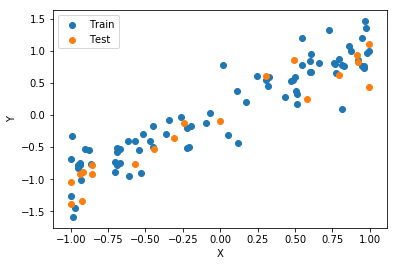

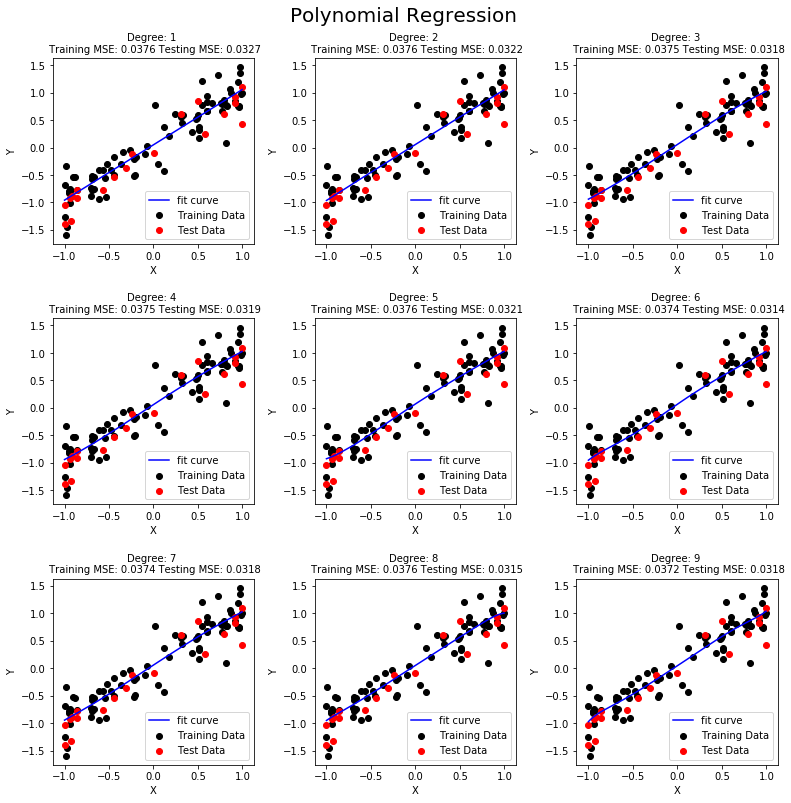

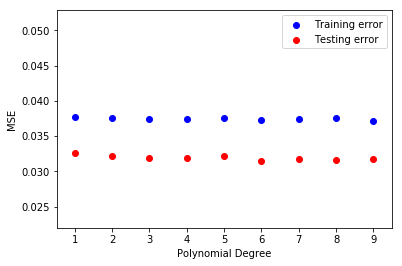

In [8]:
pol_reg(sample_size = 100)

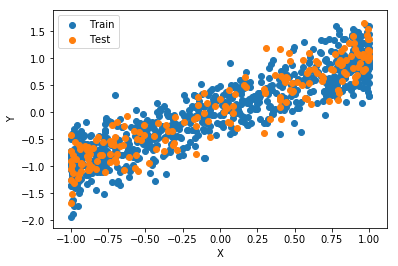

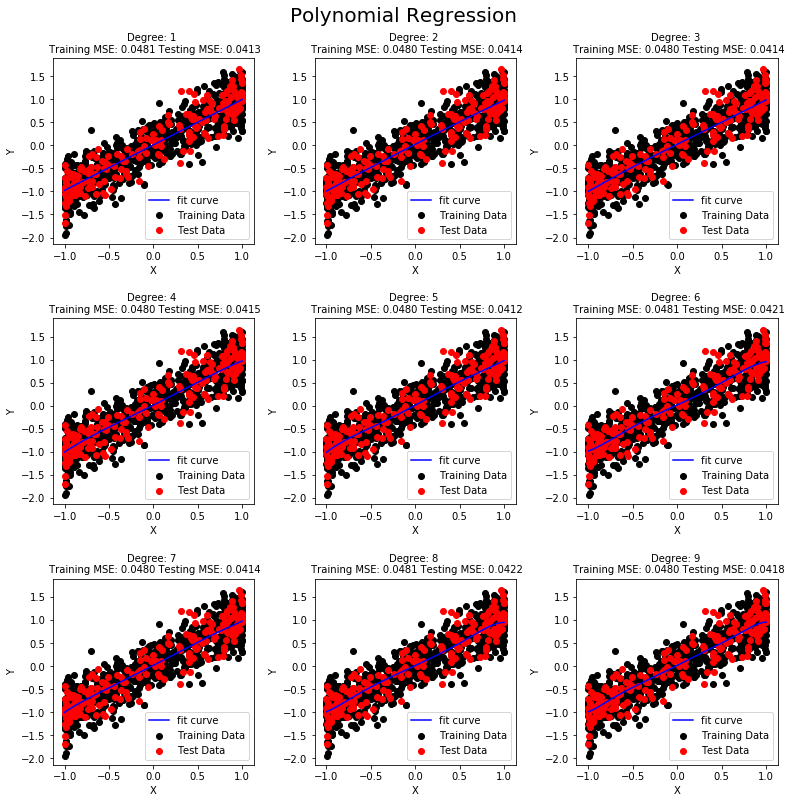

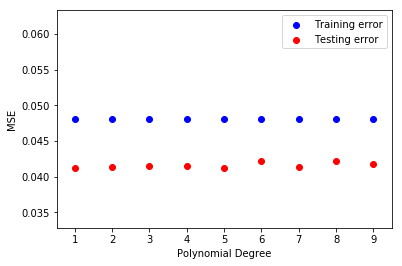

In [9]:
pol_reg(sample_size = 1000)

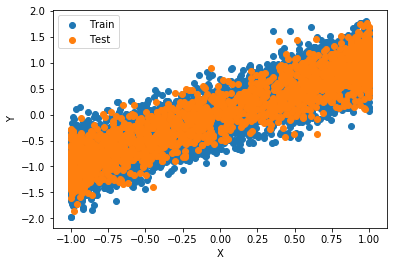

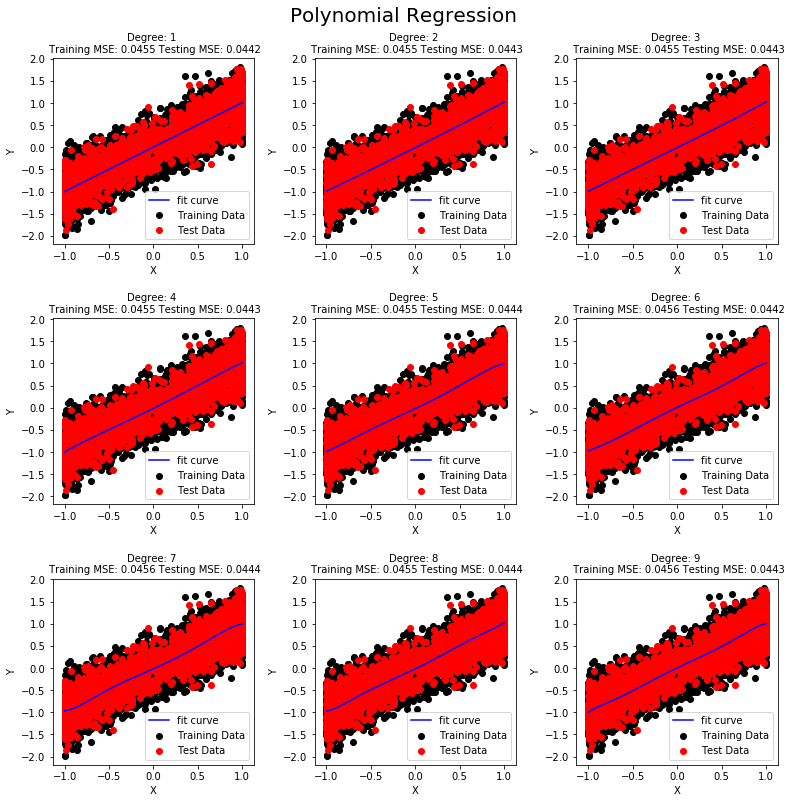

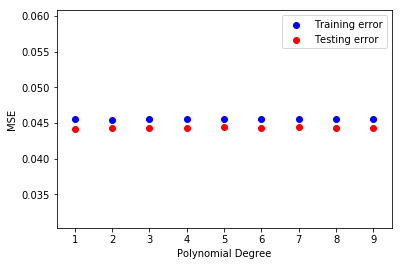

In [10]:
pol_reg(sample_size = 10000)

In [11]:
def calculate_rmse(sample_size = 10, cost_function = mean_squared_error, learning_rate=0.05):
    X, y = generate_data(sample_size, seed=1)
    X = np.reshape(X, (-1, 1))     
    X_train, X_test, y_train, y_test = train_test_split(X, y)   
    model = PolynomialRegression(4, n_iterations=3000, learning_rate=learning_rate, \
                                 cost_function = cost_function)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    return rmse

In [12]:
sample_size = [10, 100, 1000, 10000]
cost_funcs = [y_train, y_test]

cost_fun_names = ['mean_squared_error']

fig, ax = plt.subplots(1, 1, figsize=(10,5))
for cost_function, name in zip(cost_funcs, cost_fun_names):
    error = []
    for learning_rate in rates:
        rmse = calculate_rmse(sample_size = 10, cost_function = cost_function, \
                              learning_rate=learning_rate)
        error.append(rmse)
    ax.plot(rates, error, label = name)
    
    fig, axes = plt.subplots(3, 3, figsize=(13, 13))
    for sample_size, name in zip(sample_size, cost_fun_names):
    axes = axes.flatten()
    for i, (ax, y_pred) in enumerate(zip(axes, y_est)):
        ax.scatter(X_train, y_train, color = 'black', label = 'Training Data')
        ax.scatter(X_test, y_test, color = 'red', label = 'Test Data')
        sample_size = [10, 100, 1000, 10000]

        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(X, y_pred_line[i]), key=sort_axis)
        x, y_poly_pred = zip(*sorted_zip)
        ax.plot(x, y_poly_pred, color = 'blue', label = 'fit curve')   
        ax.legend(loc=4)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title("Degree: {2} \n Training MSE: {0:.4f} Testing MSE: {1:.4f}".\
                     format(training_error[i], testing_error[i], i+1), fontsize=10)
    plt.suptitle("Polynomial Regression", y = 0.935, fontsize=20)
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.savefig('Sample_' + str(sample_size) + '_curve_fit.png')
    plt.show()

IndentationError: expected an indented block (<ipython-input-12-de68a5273bbb>, line 8)

In [ ]:
sample_size = [10, 100, 1000, 10000]
cost_funcs = [y_train, y_test]

cost_fun_names = ['mean_squared_error', 'mean_absolute_error', 'fourth_power_error']

fig, ax = plt.subplots(1, 1, figsize=(10,5))
for cost_function, name in zip(cost_funcs, cost_fun_names):
    error = []
    for learning_rate in rates:
        rmse = calculate_rmse(sample_size = 10, cost_function = cost_function, \
                              learning_rate=learning_rate)
        error.append(rmse)
    ax.plot(rates, error, label = name)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('RMSE')
ax.legend()
plt.savefig('learning_rate_vs_rmse.png')
plt.show() 